Support code set-up

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import PIL

In [2]:
%%capture
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

In [3]:
class GalaxyNetDataset(Dataset):
  def __init__(self):
    self.soln = np.genfromtxt('sample_solutions.csv', delimiter=',', dtype=np.float)
    self.transform = transforms.ToTensor()

  def __getitem__(self, idx):
    img_name = 'samples/' + str(int(self.soln[idx, 0])) + ".jpg"
    image = self.transform(PIL.Image.open(img_name))
    classification = self.soln[idx, 1:]
    return image, classification

Reconstruct and load model from disk

In [4]:
from src.pytorch_preprocess import NormalizeImages

model = torch.load('effnet-b2-full-best.pt')
dataset = GalaxyNetDataset()
data_loader = DataLoader(dataset)

In consideration of limiting the upload size, we only randomly selected 100 images to accompany the project report.

Randomly display an image among the 100 examples, its classification and predictions, and its MSE.

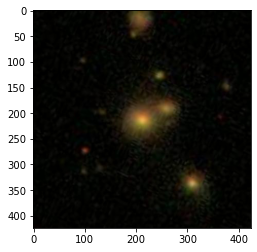

Galaxy id 246300
Overall MSE=0.01626240994305157
Label		Truth		Prediction	Error
Class1.1	0.822000	0.540596	0.281404
Class1.2	0.111000	0.322653	0.211653
Class1.3	0.067000	0.090905	0.023905
Class2.1	0.000000	0.087294	0.087294
Class2.2	0.111000	0.220950	0.109950
Class3.1	0.000000	0.045488	0.045488
Class3.2	0.111000	0.195400	0.084400
Class4.1	0.000000	0.010096	0.010096
Class4.2	0.111000	0.222150	0.111150
Class5.1	0.022200	0.056266	0.034066
Class5.2	0.022200	0.021535	0.000665
Class5.3	0.022200	0.103719	0.081519
Class5.4	0.044400	0.046711	0.002311
Class6.1	0.658883	0.402360	0.256523
Class6.2	0.341117	0.552769	0.211652
Class7.1	0.777612	0.303813	0.473799
Class7.2	0.044388	0.218781	0.174393
Class7.3	0.000000	0.016265	0.016265
Class8.1	0.000000	-0.018844	0.018844
Class8.2	0.000000	0.009919	0.009919
Class8.3	0.029679	0.050189	0.020510
Class8.4	0.029679	0.058251	0.028572
Class8.5	0.240073	0.149046	0.091027
Class8.6	0.359451	0.140786	0.218665
Class8.7	0.000000	0.004515	0.004515
Class9.1	0.000000	0

In [5]:
import matplotlib.pyplot as plt

example_idx = np.random.default_rng().choice(np.arange(dataset.soln.shape[0]))

model.eval()
image, truth = dataset[example_idx]
predictions = model(image.reshape((1, *image.shape)).type(torch.cuda.FloatTensor))

mse = np.mean(np.square(truth - predictions[0].cpu().detach().numpy()))

plt.imshow(image.numpy().transpose(1, 2, 0))
plt.show()
print('Galaxy id ' + str(int(dataset.soln[example_idx, 0])))
print('Overall MSE=' + str(mse))
print('Label\t\tTruth\t\tPrediction\tError')
for i, label in enumerate([
    'Class1.1','Class1.2','Class1.3',
    'Class2.1','Class2.2',
    'Class3.1','Class3.2',
    'Class4.1','Class4.2',
    'Class5.1','Class5.2','Class5.3','Class5.4',
    'Class6.1','Class6.2',
    'Class7.1','Class7.2','Class7.3',
    'Class8.1','Class8.2','Class8.3','Class8.4','Class8.5','Class8.6','Class8.7',
    'Class9.1','Class9.2','Class9.3',
    'Class10.1','Class10.2','Class10.3',
    'Class11.1','Class11.2','Class11.3','Class11.4','Class11.5','Class11.6'
]):
    print('{}\t{:.6f}\t{:.6f}\t{:.6f}'.format(
        label,
        truth[i],
        predictions[0, i].item(),
        np.abs(truth[i] - predictions[0, i].item())
    ))
